### How to Use and Extend the mplbasketball.court3d package
Key Capabilities

    3D Visualization of Basketball Courts:
        Draws a complete 3D basketball court using mplbasketball.
        Highlights important features like the court center, baseline, and hoop.

    Orientation and Metrics:
        Provides configurable options for the camera view:
            zlim: Controls the height (Z-axis) of the plot.
            elev: Elevation angle for the 3D view.
            azim: Azimuthal angle for rotating the 3D view.
        Debug mode outputs all metrics, including court dimensions, hoop position, and aspect scaling.

    Extendability:
        Easily add new markers or features by leveraging the Court3D class and its parameters.
        Flexible for different court types (NBA, WNBA, NCAA) and units (feet or meters).

2024-11-16 21:14:07,396 - INFO - Starting to draw the basketball court with full features...


2024-11-16 21:14:07,408 - DEBUG - Initialized 3D plot with Z limit: 20, Elevation: 30, Azimuth: 60
2024-11-16 21:14:07,463 - DEBUG - Basketball court drawn successfully.
2024-11-16 21:14:07,464 - DEBUG - Inspecting draw_court_3d function...
2024-11-16 21:14:07,464 - DEBUG - draw_court_3d Function Signature: (ax3d, showaxis=False, court_type='nba', units='ft', court_color='none', paint_color='none', line_color='black', line_alpha=1.0, line_width=2, hoop_color='black', hoop_alpha=1.0, pad=5.0, origin=array([0., 0.]))
2024-11-16 21:14:07,465 - DEBUG - draw_court_3d Function Documentation:
No documentation available.
2024-11-16 21:14:07,465 - DEBUG - Attributes in court3d Module: ['Court3D', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_get_court_params_in_desired_units', 'draw_court_3d', 'lines', 'mpl', 'np', 'patches', 'plt']
2024-11-16 21:14:07,465 - DEBUG - Inspecting Court3D class...
2024-11-16 21:14:07,466 - DEBUG - Court3

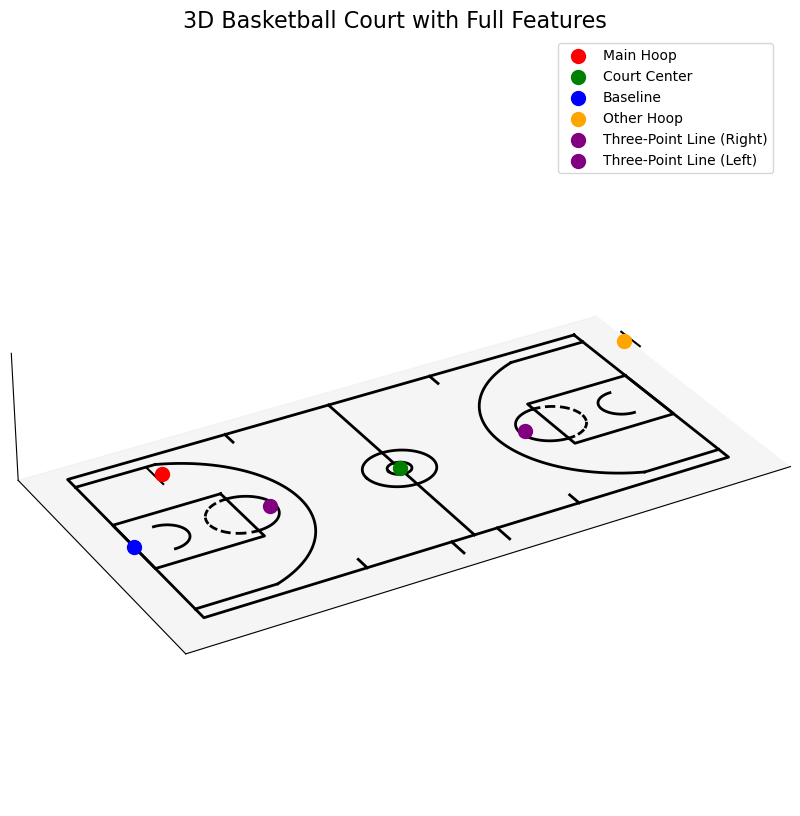

2024-11-16 21:14:07,596 - INFO - Finished drawing the basketball court with full features.


In [ ]:
import logging
from mplbasketball.court3d import Court3D, draw_court_3d
import matplotlib.pyplot as plt
import numpy as np
import inspect

# Configure logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def inspect_mplbasketball():
    """
    Inspect the `mplbasketball` library for available attributes and functions.
    """
    try:
        # Inspect draw_court_3d
        logger.debug("Inspecting draw_court_3d function...")
        signature = inspect.signature(draw_court_3d)
        logger.debug(f"draw_court_3d Function Signature: {signature}")
        docstring = draw_court_3d.__doc__ or "No documentation available."
        logger.debug(f"draw_court_3d Function Documentation:\n{docstring}")

        # List attributes in court3d module
        import mplbasketball.court3d as court3d
        attributes = dir(court3d)
        logger.debug(f"Attributes in court3d Module: {attributes}")

        # Inspect Court3D class
        logger.debug("Inspecting Court3D class...")
        class_doc = Court3D.__doc__ or "No documentation available."
        logger.debug(f"Court3D Class Documentation:\n{class_doc}")
        class_attrs = dir(Court3D)
        logger.debug(f"Attributes of Court3D Class: {class_attrs}")

        # Initialize Court3D and print parameters
        court = Court3D(court_type="nba", units="ft")
        logger.debug(f"Court3D Parameters: {court.court_parameters}")

        # Inspect internal function for unit conversion
        logger.debug("Inspecting _get_court_params_in_desired_units function...")
        source = inspect.getsource(court3d._get_court_params_in_desired_units)
        logger.debug(f"_get_court_params_in_desired_units Source Code:\n{source}")
    except Exception as e:
        logger.error(f"Error during inspection: {e}")

def initialize_plot(zlim=20, elev=30, azim=60):
    """
    Initialize a 3D plot with specified view settings and outputs setup details.

    Returns:
    - fig: The Matplotlib figure object.
    - ax: The Matplotlib 3D axis object.
    """
    try:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection="3d")
        ax.set_zlim([0, zlim])
        ax.set_box_aspect([1, 1, 1])
        ax.view_init(elev=elev, azim=azim)
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        logger.debug(f"Initialized 3D plot with Z limit: {zlim}, Elevation: {elev}, Azimuth: {azim}")
        return fig, ax
    except Exception as e:
        logger.error(f"Failed to initialize plot: {e}")
        raise

def get_hoop_position(court_type="nba", units="ft"):
    """
    Calculate the 3D position of the basketball hoop based on court specifications.

    Returns:
    - (x, y, z): Coordinates of the hoop in 3D space.
    """
    try:
        court = Court3D(court_type=court_type, units=units)
        params = court.court_parameters
        x = params['court_dims'][0] / 2 - params['hoop_distance_from_edge']
        y = 0.0
        z = params['hoop_height']
        logger.debug(f"Calculated hoop position at (x={x}, y={y}, z={z}) for court type '{court_type}' in '{units}' units.")
        return x, y, z
    except KeyError as e:
        logger.error(f"Key error when accessing court parameters: {e}")
        raise
    except Exception as e:
        logger.error(f"Unexpected error in get_hoop_position: {e}")
        raise

def draw_debug_markers(ax, court_params, origin=(0.0, 0.0)):
    """
    Place debug markers on the court for key positions and outputs their details.
    """
    try:
        # Center of the court
        center_x, center_y = origin
        ax.scatter(center_x, center_y, 0, c="green", s=100, label="Court Center")
        logger.debug(f"Marked court center at (x={center_x}, y={center_y}, z=0)")

        # Baseline position
        baseline_x = origin[0] + court_params["court_dims"][0] / 2
        baseline_y = origin[1]
        ax.scatter(baseline_x, baseline_y, 0, c="blue", s=100, label="Baseline")
        logger.debug(f"Marked baseline at (x={baseline_x}, y={baseline_y}, z=0)")
    except Exception as e:
        logger.error(f"Error in draw_debug_markers: {e}")
        raise
    
    
def draw_three_point_line_marker(ax, court_params, origin=(0.0, 0.0)):
    """
    Draws markers for the three-point line at the specified court parameters.

    Parameters:
    - ax: Matplotlib 3D axis object.
    - court_params: Dictionary containing court dimensions and parameters.
    - origin: The (x, y) origin of the court. Default is (0.0, 0.0).

    Returns:
    - None
    """
    three_point_arc_radius = court_params['three_point_arc_diameter'] / 2
    x_arc = origin[0] + court_params['court_dims'][0] / 2 - three_point_arc_radius
    y_arc = origin[1]

    # Place a marker for the three-point line
    ax.scatter(x_arc, y_arc, 0, c="purple", s=100, label="Three-Point Line (Right)")
    ax.scatter(-x_arc, y_arc, 0, c="purple", s=100, label="Three-Point Line (Left)")
    logger.debug(f"Marked three-point line arcs at (x={x_arc}, y={y_arc}, z=0) and (x={-x_arc}, y={y_arc}, z=0)")


def draw_other_hoop_marker(ax, court_params, origin=(0.0, 0.0)):
    """
    Draws a marker for the hoop at the opposite end of the court.

    Parameters:
    - ax: Matplotlib 3D axis object.
    - court_params: Dictionary containing court dimensions and parameters.
    - origin: The (x, y) origin of the court. Default is (0.0, 0.0).

    Returns:
    - None
    """
    x_other_hoop = -court_params['court_dims'][0] / 2 + court_params['hoop_distance_from_edge']
    y_other_hoop = origin[1]
    z_other_hoop = court_params['hoop_height']

    # Place a marker for the other hoop
    ax.scatter(x_other_hoop, y_other_hoop, z_other_hoop, c="orange", s=100, label="Other Hoop")
    logger.debug(f"Marked other hoop at (x={x_other_hoop}, y={y_other_hoop}, z={z_other_hoop})")


def draw_court_with_full_features(court_type="nba", units="ft", zlim=20, elev=30, azim=60):
    """
    Visualizes a full 3D basketball court with additional key features like hoops,
    the three-point line, and baseline markers.

    Parameters:
    - court_type: The type of basketball court ('nba', 'wnba', 'ncaa').
    - units: The unit system for the court dimensions ('ft' or 'm').
    - zlim: Maximum Z-axis limit.
    - elev: Elevation angle for the 3D view.
    - azim: Azimuthal angle for the 3D view.

    Returns:
    - None
    """
    try:
        logger.info("Starting to draw the basketball court with full features...")
        fig, ax = initialize_plot(zlim=zlim, elev=elev, azim=azim)

        # Draw basketball court
        draw_court_3d(ax, origin=np.array([0.0, 0.0]), line_width=2)
        logger.debug("Basketball court drawn successfully.")

        # Inspect the mplbasketball package
        inspect_mplbasketball()

        # Get and mark the main hoop position
        hoop_x, hoop_y, hoop_z = get_hoop_position(court_type=court_type, units=units)
        ax.scatter(hoop_x, hoop_y, hoop_z, c="red", s=100, label="Main Hoop")
        logger.debug(f"Placed main hoop marker at (x={hoop_x}, y={hoop_y}, z={hoop_z})")

        # Get court parameters
        court_params = Court3D(court_type, units).court_parameters

        # Add debug markers for the court features
        draw_debug_markers(ax, court_params, origin=(0.0, 0.0))

        # Add other hoop marker
        draw_other_hoop_marker(ax, court_params, origin=(0.0, 0.0))

        # Add three-point line markers
        draw_three_point_line_marker(ax, court_params, origin=(0.0, 0.0))

        # Enforce uniform scaling
        ax.set_box_aspect([court_params['court_dims'][0], court_params['court_dims'][1], zlim])
        logger.debug("Enforced uniform scaling for all axes.")

        # Add legend and title
        ax.legend()
        ax.set_title("3D Basketball Court with Full Features", fontsize=16)

        # Show the plot
        plt.show()
        logger.info("Finished drawing the basketball court with full features.")
    except Exception as e:
        logger.error(f"An error occurred while drawing the court: {e}")
        raise


# Run the visualization
if __name__ == "__main__":
    draw_court_with_full_features(court_type="nba", units="ft", zlim=20, elev=30, azim=60)



/opt/conda/envs/data_science_ft_bio_predictions/lib/python3.10/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
2024-11-17 18:46:52,558 - Loaded court parameters: {'court_dims': [94.0, 50.0], 'hoop_distance_from_edge': 5.25, 'hoop_diameter': 0.75, 'backboard_distance_from_edge': 4.0, 'backboard_width': 6.0, 'charge_circle_radius': 4.0, 'charge_circle_side_length': 3.0, 'inbound_line_distance_from_edge': 28.0, 'inbound_line_length': 3.0, 'outbound_line_distance_from_center': 4.083333333333333, 'outbound_line_length': 4.0, 'outer_paint_dims': [18.833333333333332, 15.666666666666666], 'inner_paint_dims': [18.833333333333332, 11.666666666666666], 'outer_circle_diameter': 6.0, 'inner_circle_diameter': 2.0, 'three_point_arc_angle': 68.13,

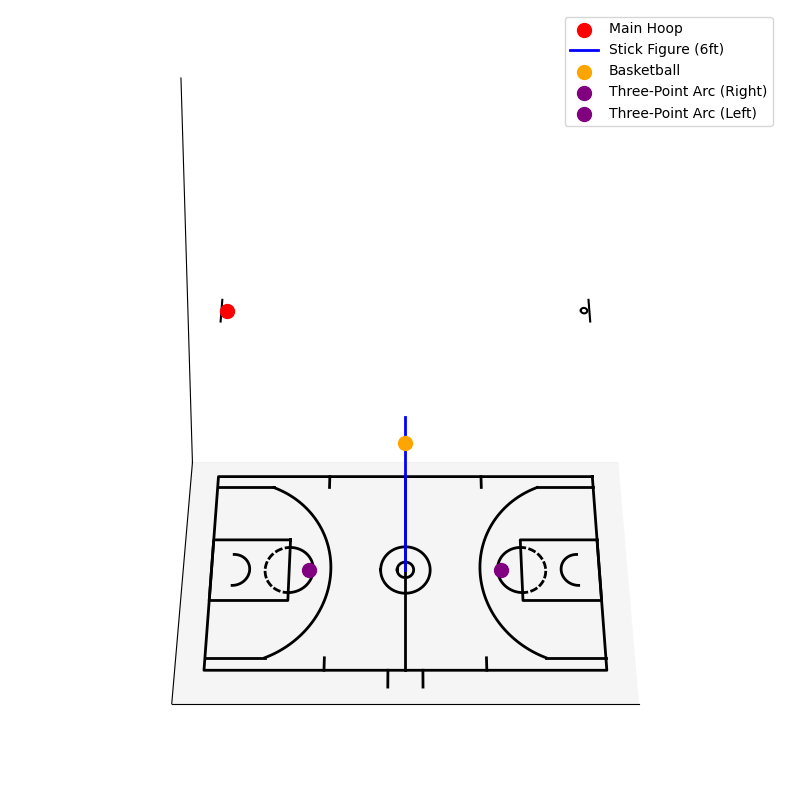

In [3]:
import logging
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mplbasketball.court3d import Court3D, draw_court_3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import inspect

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(message)s")
logger = logging.getLogger(__name__)

# Initialize 3D plot
fig, ax = plt.figure(figsize=(12, 10)), None

# Inspect court dimensions and parameters
court = Court3D(court_type="nba", units="ft")
court_params = court.court_parameters
logger.info(f"Loaded court parameters: {court_params}")

# NBA court reference dimensions
nba_length = 94.0  # Length of the court in feet
nba_width = 50.0  # Width of the court in feet
scale_factor = court_params["court_dims"][0] / nba_length  # Scale based on length

logger.info(f"Scale factor calculated: {scale_factor:.2f}")


def initialize_plot(zlim, elev=30, azim=60):
    """
    Initialize 3D plot with the specified limits and perspective.
    """
    global ax
    ax = fig.add_subplot(111, projection="3d")
    ax.set_zlim([0, zlim])
    ax.set_box_aspect([1, 1, 1])  # Uniform scaling
    ax.view_init(elev=elev, azim=azim)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    logger.info(f"3D plot initialized: Z-limit={zlim}, Elevation={elev}, Azimuth={azim}")


# Set up plot dimensions
zlim = court_params["hoop_height"] + 5  # Add buffer above hoop height
initialize_plot(zlim=zlim, elev=30, azim=90)

# Draw the basketball court
draw_court_3d(ax, origin=np.array([0.0, 0.0]), line_width=2)
logger.info(f"Basketball court drawn. Court dimensions: {court_params['court_dims']} (ft)")


def add_scaled_features(ax, court_params, scale_factor):
    """
    Add scaled court features including hoops, three-point arcs, and a stick figure.
    """
    # Main hoop
    hoop_x = court_params['court_dims'][0] / 2 - court_params['hoop_distance_from_edge']
    hoop_y, hoop_z = 0, court_params['hoop_height']
    scaled_hoop_height = hoop_z * scale_factor
    ax.scatter(hoop_x, hoop_y, scaled_hoop_height, c="red", s=100, label="Main Hoop")
    logger.info(f"Main Hoop: (x={hoop_x}, y={hoop_y}, z={scaled_hoop_height:.2f} ft)")

    # Stick figure at center court
    stick_figure_height = 6  # 6 feet tall in real life
    scaled_height = stick_figure_height * scale_factor
    stick_base = [0, 0, 0]  # Base at center court
    stick_top = [0, 0, scaled_height]  # Top scaled to court height
    ax.plot([stick_base[0], stick_top[0]], [stick_base[1], stick_top[1]], [stick_base[2], stick_top[2]],
            c="blue", lw=2, label="Stick Figure (6ft)")
    logger.info(f"Stick Figure: Base={stick_base}, Top={stick_top} (scaled to {scaled_height:.2f} ft)")

    # Basketball
    ball_diameter = 1  # Real diameter of basketball ~1 ft
    scaled_ball_diameter = ball_diameter * scale_factor
    ball_z = court_params["hoop_height"] / 2 * scale_factor  # Place basketball at half hoop height
    basketball = ax.scatter(0, 0, ball_z, c="orange", s=scaled_ball_diameter * 100, label="Basketball")
    logger.info(f"Basketball added near center court at (x=0, y=0, z={ball_z:.2f}) with diameter {scaled_ball_diameter:.2f} ft")

    # Three-point arcs
    three_point_radius = court_params['three_point_arc_diameter'] / 2
    scaled_radius = three_point_radius * scale_factor
    three_point_x1 = court_params['court_dims'][0] / 2 - scaled_radius
    three_point_x2 = -three_point_x1
    ax.scatter(three_point_x1, 0, 0, c="purple", s=100, label="Three-Point Arc (Right)")
    ax.scatter(three_point_x2, 0, 0, c="purple", s=100, label="Three-Point Arc (Left)")
    logger.info(f"Three-Point Arcs: Right=(x={three_point_x1:.2f}, y=0, z=0), Left=(x={three_point_x2:.2f}, y=0, z=0)")


add_scaled_features(ax, court_params, scale_factor)

# Update functions for animation
def update_view(angle):
    """
    Rotate the 3D view dynamically.
    """
    ax.view_init(elev=30, azim=angle)


def update_ball(frame):
    """
    Animate the basketball moving across the court.
    """
    ball_x = -court_params['court_dims'][0] / 2 + frame
    ball_y, ball_z = 0, court_params["hoop_height"] / 2 * scale_factor  # Fixed height relative to hoop
    basketball._offsets3d = ([ball_x], [ball_y], [ball_z])
    logger.info(f"Basketball position updated: (x={ball_x}, y={ball_y}, z={ball_z:.2f})")


# Control function for dynamic adjustments
def adjust_view(zlim, elev=30, azim=90):
    """
    Dynamically adjust the perspective and scale.
    """
    ax.set_zlim([0, zlim])
    ax.view_init(elev=elev, azim=azim)
    logger.info(f"View adjusted: Z-limit={zlim}, Elevation={elev}, Azimuth={azim}")


# Animations
anim_view = FuncAnimation(fig, update_view, frames=np.arange(0, 360, 2), interval=50)
anim_ball = FuncAnimation(fig, update_ball, frames=np.arange(0, int(court_params["court_dims"][0]), 1), interval=50)

# Display plot
plt.legend()
plt.show()
